# Exercice DataSet & Algo modèle linéaire

## Algo avec 1 X et 1 Y

<strong> Problématique : -> Plus un pokémon a de points de vie , plus son nombre de points d'attaques augmente ?

<strong> <p style="font-size: 150%"> DataCleaning & Importation CSV

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [9]:
dataCSV = "pokemon.csv"

data = pd.read_csv(dataCSV, usecols = ['id', 'Name', 'HP', 'Attack'])

In [11]:
data.isnull().all()

id        False
Name      False
HP        False
Attack    False
dtype: bool

In [12]:
data.dtypes

id         int64
Name      object
HP         int64
Attack     int64
dtype: object

In [14]:
data.head(10)

,id,Name,HP,Attack
0,1,Bulbasaur,45,49
1,2,Ivysaur,60,62
2,3,Venusaur,80,82
3,4,Charmander,39,52
4,5,Charmeleon,58,64
5,6,Charizard,78,84
6,7,Squirtle,44,48
7,8,Wartortle,59,63
8,9,Blastoise,79,83
9,10,Caterpie,45,30


In [15]:
data.shape

(1061, 4)

<strong> <p style="font-size: 150%"> CREATE X & Y

In [57]:
#X := HP Pokemon
#Y := Attack Pokemon

#Create Var X & Y

X = data[['HP']]
Y = data[['Attack']]

<strong> <p style="font-size: 150%"> CREATE SPLIT WITH SKLEARN


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [87]:
X_train.head(5)

,HP
282,40
733,48
1026,95
262,38
326,60


In [88]:
Y_train.head(5)

,Attack
282,30
733,70
1026,95
262,30
326,60


<strong> <p style="font-size: 150%"> CREATE LinearRegression


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model


clf = linear_model.LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None, normalize = False)

In [90]:
clf.fit(X_train, Y_train)

LinearRegression()

<strong> <p style="font-size: 150%"> Print Coef


In [93]:
print('Coef : ', clf.coef_)
print('Intercept : ', clf.intercept_)

Coef :  [[0.59694688]]
Intercept :  [37.16605845]


<strong> <p style="font-size: 150%"> Prédiction sur X & Squared_error


In [94]:
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
Y_prediction = clf.predict(X_test)

In [65]:
Y_prediction

array([[ 63.62899008],
       [ 88.09287566],
       [ 74.50182812],
       [ 74.50182812],
       [ 87.54923376],
       [ 47.31973303],
       [ 71.78361861],
       [ 57.10528726],
       [ 63.62899008],
       [ 73.41454431],
       [ 66.34719959],
       [101.6839232 ],
       [ 74.50182812],
       [ 77.22003762],
       [ 84.83102425],
       [ 73.95818621],
       [ 66.34719959],
       [ 82.65645664],
       [ 79.93824713],
       [ 85.37466615],
       [ 90.81108517],
       [ 63.62899008],
       [ 65.80355769],
       [ 77.22003762],
       [ 66.34719959],
       [ 74.50182812],
       [ 67.9781253 ],
       [ 77.22003762],
       [ 79.93824713],
       [ 84.28738235],
       [ 96.24750419],
       [ 58.19257106],
       [ 71.78361861],
       [ 63.62899008],
       [ 77.22003762],
       [ 82.65645664],
       [ 77.22003762],
       [ 69.0654091 ],
       [ 93.52929468],
       [ 71.78361861],
       [ 93.52929468],
       [ 63.62899008],
       [ 84.28738235],
       [ 79

In [96]:
print('Mean Squared Error : %.2f' % mean_squared_error(Y_test, Y_prediction))

Mean Squared Error : 1055.05


In [97]:
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_prediction))

Coefficient of determination: 0.02


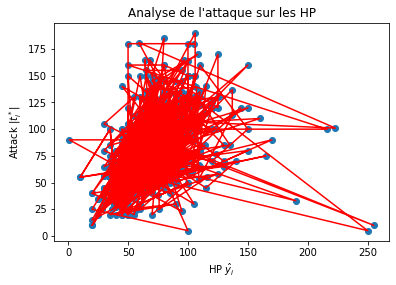

In [107]:
plt.scatter(X, Y)
plt.plot(X, Y, color='red')

plt.title("Analyse de l'attaque sur les HP")
plt.xlabel("HP $\hat{y}_i$")
plt.ylabel("Attack $|t_i^*|$")

plt.show()